## Bipartite 

`Bipartite` 모듈은 이분 그래프를 위한 함수와 연산자를 제공합니다. 이분 그래프는 `B = (U, V, E)` 즉, `U, V` 두 노드의 집합과 `E` 에지 집합으로 구성되어 있습니다. 

In [2]:
import networkx as nx 
from networkx.algorithms import bipartite

In [3]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

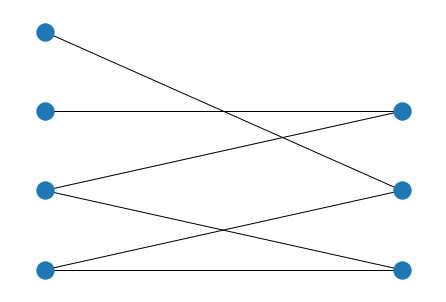

In [18]:
X, Y = nx.bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X))
pos.update( (n, (2, i)) for i, n in enumerate(Y))
nx.draw(B, pos=pos)

In [19]:
nx.is_connected(B) # True 
bottom_nodes, top_nodes = bipartite.sets(B)

In [20]:
# 노드들이 연결되어 있지 않는 경우에는 노드에 색상을 지정해두어서 사용할 수 있습니다. 
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(B) - top_nodes # bipartite=0으로 지정한 노드들은 top_nodes로 지정하고 아닌 노드는 bottom_nodes로 지정합니다. 

In [21]:
print(round(bipartite.density(B, bottom_nodes), 2)) # 0.5 
G = bipartite.projected_graph(B, top_nodes)

0.5


In [23]:
RB = bipartite.random_graph(5, 7, 0.2)
RB_top = {n for n, d in RB.nodes(data=True) if  d['bipartite']==0}
RB_bottom = set(RB) - RB_top 
list(RB_top) # [1, 2, 3, 4]

list(RB_bottom) # [5, 6, 7, 8, 9, 10, 11]

[5, 6, 7, 8, 9, 10, 11]

## Basic functions 

- `is_bipartite`(G): Returns True if graph G is bipartite, False if not.
- `is_bipartite_node_set`(G, nodes): Returns True if nodes and G/nodes are a bipartition of G.
- `sets`(G[, top_nodes]): Returns bipartite node sets of graph G.
- `color`(G): Returns a two-coloring of the graph.
- `density`(B, nodes): Returns density of bipartite graph B.
- `degrees`(B, nodes[, weight]): Returns the degrees of the two node sets in teh bipartite graph B.
- `generate_edgelist`(G[, delimiter, data]): Generate a single line of the bipartite graph G in edge list format.
- `write_edgelist`(G, path[, comments, ...]): Write a bipartite graph as a list of edges.
- `parse_edgelist`(lines[, comments, delimiter, ...]): Parse lines of an edge list representation of a bipartite graph.
- `read_edgelist`(path[, comments, delimiter, ...]): Read a bipartite graph from a list of edges.

## Matching

In [27]:
G = nx.complete_bipartite_graph(2, 3)
left, right = nx.bipartite.sets(G)
list(left) # [0, 1]
list(right) # [2, 3, 4]

nx.bipartite.maximum_matching(G)
# {0:2, 1:3, 2:0, 3:1}

{0: 2, 1: 3, 2: 0, 3: 1}

- `eppstein_matching`(G[, top_nodes]): Returns the maximum cardinality matching of the bipartite graph `G`.
- `hopcroft_karp_matching`(G[, top_nodes]): Returns the maximum cardinality matching of the bipartite graph `G`.
- `to_vertext_cover`(G, matching[, top_nodes]): Returns the minimum vertext cover corresponding to the given maximum matching of the bipartite graph `G`.
- `maximum_matching`(G[, top_nodes]): Returns the maximum cardinality matching in the given bipartite graph.
- `minimum_weight_full_matching`(G[, top_nodes, ...]): Returns a minimum weight full matching of the bipartite graph `G`.

## Matrix 

- `biadjacency_matrix`(G, row_order[, ...]): Returns the biadjacency matrix of the bipartite graph G.
- `from_biadjacency_matrix`(A[, create_using, ...]): Creates a new bipartite graph from a biadjacency matrix given as a SciPy sparse matrix.

## Projections

- `projected_graph`(B, nodes[, multigraph]): Returns the projection of B onto one of ist node sets.
- `weighted_projected_graph`(B, nodes[, ratio]): Returns a weighted projection of B onto one of its node sets.
- `collaboration_weighted_projected_graph`(B, nodes): Newman's weighted projection of B onto one of ist node sets.
- `overlap_weighted_projected_graph`(B, nodes[, ...]): Overlap weighted projection of B onto one of its node sets.
- `generic_weighted_projected_graph`(B, nodes[, ...]): Weighted projection of B with a user-specified weight function.

## Spectral 

- `spectral_bipartivity`(G[, nodes, weight]): Returns the spectral bipartivity.


## Clustering 

- `clustering`(G[, nodes, mode]): Compute a bipartite clustering coefficient for nodes.
- `average_clustering`(G[, nodes, mode]): Compute the average bipartite clustering coefficient.
- `latapy_clustering`(G[, nodes, mode]): Compute a bipartite clustering coefficient for nodes.
- `robins_alexander_clustering`(G): Compute the bipartite clustering of G.

## Redundancy 

- `node_redundancy`(G[, nodes]): Computes the node redundancy coefficient for the nodes in the bipartite graph `G`.

## Centrality 

- `closeness_centrality`(G, nodes[, normalized]): Compute the closeness centrality for nodes in a bipartite network.
- `degree_centrality`(G, nodes): Compute the degree centrality for nodes in a bipartite network.
- `betweenness_centrality`(G, nodes): Compute betweenness centrality for nodes in a bipartite network.

## Generators

- `complete_bipartite_graph`(n1, n2[, create_using]): Returns the complete bipartite graph `K_{n_1, n_2}`.
- `configuration_model`(aseq, bseq[, ...]): Returns a random bipartite graph from two given degree sequences. 
- `bavel_hakimi_graph`(aseq, bseq[, create_using]): Return a bipartite graph from tow given degree sequences using a Havel-Hakimi style construction.
- `reverse_havel_hakimi_graph`(aseq, bseq[, ...]): Return a bipartite graph from two given degree sequences using a Havel-Hakimi style construction.
- `alternating_havel_hakimi_graph`(aseq,bseq[, ...]): Returns a bipartite greaph from two given degree sequences using an alternating Havel-Hakimi style construction.
- `preferential_attachment_graph`(aseq, p[, ...]): Create a bipartite graph with a preferential attachment model from a given single degree sequence.
- `ramdom_graph`(n, m, p[, seed, directed]): Returns a bipartite random graph.
- `gnmk_random_graph`(n, m, k[, seed, directed]): Returns a random bipartite graph G_{n, m, k}

## Covering 

- `min_edge_cover`(G[, matching_algorithm]): Returns a set of edges which constitutes the minimum edge cover of the graph.